In [40]:
import numpy as np
import copy
import matplotlib.pyplot as  plt
import matplotlib.image as img
from PIL import Image 
from collections import Counter

In [36]:
class k_means:
    def __init__(self,n_clstrs,seed=None):
        if seed:
            np.random.seed(seed)
        self.colored_points=[]
        self.n_clstrs=n_clstrs


    def find_nearest_cluster(self,point):
        return np.argmin([np.linalg.norm(point-cluster) for cluster in self.clusters])

    def color_points(self):
        self.colored_points=np.array([self.find_nearest_cluster(point) for point in self.points])
        
    def calc_new_clusters(self):
        old=copy.deepcopy(self.clusters)
        for n_cluster in range(len(self.clusters)):
            points=np.where(self.colored_points == n_cluster)
            if points:
                self.clusters[n_cluster]=np.mean(self.points[points],axis=0)
        if np.array_equal(old,self.clusters):
            return False
        return True

    def calc_claster_distanse(self):
        distanse=[]
        objects_per_cluster=Counter(self.colored_points)
        for cluster in self.clusters:
            distanse.append([np.linalg.norm(cluster_2-cluster) for  cluster_2 in self.clusters])
        print(f'============Расстояние между центроидами=====\n{distanse}')
        print(f'===========Число объектов в кластере================\n{objects_per_cluster} ')
        
    def vizualize(self):
        plt.title('Представление точек')
        colors=['r','green','y','black']
        for n_cluster in range(len(self.clusters)):
            points=self.points[np.where(self.colored_points == n_cluster)]
            x_1 = []
            y_1 = []
            for el in points:
                x_1.append(el[0])
                y_1.append(el[1])
            plt.scatter(x_1,y_1,marker='o',c=colors[n_cluster%len(colors)],edgecolor='b')

        x_1 = []
        y_1 = []
        for n_cluster,el in enumerate(self.clusters):
            plt.scatter(el[0],el[1],marker='o',c=colors[n_cluster%len(colors)],edgecolor='r')
        plt.grid()
        plt.show()
    

            

        

    def fit(self,X):
        self.points=X
        #Определяем кластеры случайным образом
        self.clusters=self.points[np.random.choice(self.points.shape[0],self.n_clstrs,replace=False)]
        #Окрашиваем входные точки по близости к цетроидам
        self.color_points()
        # Пересчитываем центтроиды
        while self.calc_new_clusters():
            self.color_points()
            self.calc_claster_distanse()
            

        



In [23]:
class image_zip:
    def __init__(self,image):
        self.image=img.imread(image)
        self.old_shape=self.image.shape
        print(self.image.shape)
        self.image=self.image.reshape((-1,3))
        print(self.image.shape)

    def reduce_colors(self):
        for i,pixel in enumerate(self.image):
            self.image[i]=self.hand.clusters[self.hand.colored_points[i]]
            
    def zip(self,zip_n):
        self.n_clusters=int(256/zip_n)
        self.hand=k_means(self.n_clusters)
        self.hand.fit(self.image)
        self.reduce_colors()


    def show(self):
        self.image=self.image.reshape(self.old_shape)
        Image.fromarray(self.image).show()
    
    

In [26]:
zipper=image_zip('162.jpg')
zipper.zip(50)
zipper.show()




(464, 550, 3)
(255200, 3)


C:\Users\servo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\servo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


============Расстояние между центроидами=====
[[0.0, 358.0223456713282, 266.08645211660064, 360.91688793959196, 256.5677298492544], [91.49863386958299, 0.0, 348.2901089609063, 241.53053637169774, 112.15614116043757], [189.6997627831938, 98.4377976185977, 0.0, 96.97937925146768, 209.97380789041284], [99.70456358662827, 240.46829312822095, 347.1440623141925, 0.0, 118.51582172857766], [333.75889501255244, 335.28942721177475, 242.76943794472976, 338.22773393085316, 0.0]]


============Расстояние между центроидами=====
[[0.0, 6.164971406705859, 5.007776750772702], [6.164971406705859, 0.0, 4.84358119223494], [5.007776750772702, 4.84358119223494, 0.0]]
===========Число объектов в кластере================
Counter({0: 238, 2: 158, 1: 104}) 
============Расстояние между центроидами=====
[[0.0, 5.656108799752798, 5.198966973080784], [5.656108799752798, 0.0, 5.007473425633733], [5.198966973080784, 5.007473425633733, 0.0]]
===========Число объектов в кластере================
Counter({0: 223, 2: 149, 1: 128}) 
============Расстояние между центроидами=====
[[0.0, 5.499177339775301, 5.244803257382582], [5.499177339775301, 0.0, 5.084376595118922], [5.244803257382582, 5.084376595118922, 0.0]]
===========Число объектов в кластере================
Counter({0: 212, 2: 149, 1: 139}) 
============Расстояние между центроидами=====
[[0.0, 5.4345246831266145, 5.2498515051447425], [5.4345246831266145, 0.0, 5.115796476740054], [5.2498515051447425, 5.115796476740054, 0.0]]
======

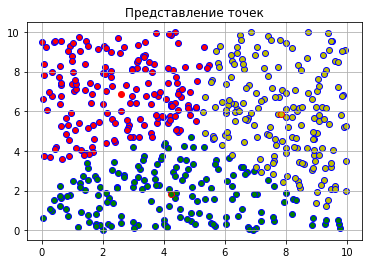

In [37]:
model=k_means(3)
X=10*np.random.rand(500,2)

model.fit(X)
model.vizualize()